# Price and Floor Space Relationship in Chaoyang District, Beijing, China

## Project Idea

The real estate price in Beijing is considerably the highest in China. Comparing the average estate price in the world, it is surprisingly one of the toppest. Yet, the house pricing in Beijing fluctuates from region to region depending on many factors. Chaoyang District is the most populated area in Beijing and, therefore, has a larger and denser housing information. Our group will use a dataset called "Housing Price in Beijing" and integrate those data from Chaoyang District, and use the integrated dataset to analyze the average house price versus actual floor space of house in Chaoyang District. This project provides a comprehensive analysis of the fluctuations of house prices around the actual size of houses in Chaoyang District, Beijing. It includes summary house price data and analysis of house prices in Chaoyang district, and we visualize these data using scatterplot.

### Data Sources (Acknowledgement) 
The dataset fetchs from a real estate selling merchandise named "Lianjia". The dataset includes housing price, accurate coordinates, community ID, time of trading, area in meter square, average price per square, total price, number of rooms, floor, etc. in Beijing from 2011 to 2017. However, the group will only focus on the avergae price per square in the dataset and the total square of the houses. The dataset includes over 318,000 individual data with complete values. Since the original dataset file is way too large for uploading on Github for uses, we have modified and deleted few unrelated columns, such as Long., Lat., and community IDs. Thus, we can upload and use this dataset for further analysis.

<cite>Qiu, Qichen. “Housing Price in Beijing.” Kaggle, 7 July 2018, www.kaggle.com/ruiqurm/lianjia?select=new.csv. </cite>
    
Original Link: www.kaggle.com/ruiqurm/lianjia?select=new.csv (Accessed 3/11/2021)
Source Link: https://raw.githubusercontent.com/yvx5166/DS330Dataset/main/new.csv

### Programming Sources (Acknowledgement) 

<cite>Bostock, M., Ogievetsky, V., & Heer, J. (2011). D³ data-driven documents. *IEEE transactions on visualization and computer graphics*, 17(12), 2301-2309, https://dl.acm.org/doi/10.1109/TVCG.2011.185</cite>

## Prototype

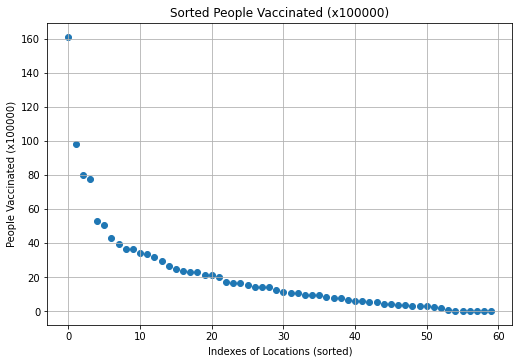

#### Write-up

describe describe describe describe describe describe describe describe describe describe 

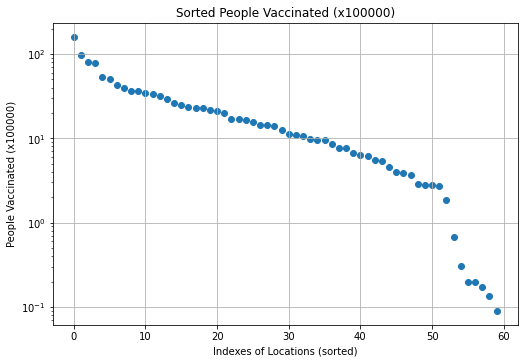

#### Write-up

describe describe describe describe describe describe describe describe describe describe 

## Final Graph

describe describe describe describe describe describe describe describe describe describe 


In [24]:
%%html
<table>
    <tr style="background-color:white">
        <td colspan="2" style="text-align: center;"><h1>People Vaccinated (x 100000) (Linear vs. Log Scale)</h1></td>
    </tr>
    <tr style="background-color:white">
        <td><div id="final"></div></td><td><div id="input"></div></td>
    </tr>
    <tr style="background-color:white">
        <td colspan="2"><div id="legend"></div></td>
    </tr>
</table>

###  Final Write-up

final final final final final final final final final final final final 

### Code

In [21]:
from IPython.display import HTML, Javascript, display

def configure_d3():
    display(Javascript("""
    require.config({
      paths: {
        d3: "https://d3js.org/d3.v6.min"
      }
    })"""))


configure_d3()

<IPython.core.display.Javascript object>

In [23]:
%%html
<script type="text/javascript">   
require(['d3'], function (d3) {
    
    d3.csv('https://raw.githubusercontent.com/yvx5166/DS330Dataset/main/new.csv')
        .then(function(data) {
            d3.select("div#final").selectAll("*").remove()
            
            const width = 700
            const height = 400
            const margin = 60 
            data = data.filter(d=> (d.elevator = "1") && (d.district = "7"))


            data = data.filter(d=> d.price != '' ) && (d.square != '' )

            const xScale = d3.scaleLinear().range([margin , width - margin]).domain(d3.extent(data, (d,i) => d.square))
            const yScale = d3.scaleLinear().range([height-margin , margin]).domain(d3.extent(data, (d,i) => d.price))
            const palette = d3.interpolateOranges
            
            const svg = d3.select("div#final").append("svg")
                .attr("width", width)
                .attr("height", height)
            
            
            const xAxis = d3.axisBottom().scale(xScale)
            
            svg.append("g")
                .attr("class", "axis")
                .attr("transform", "translate(0," + (height-margin) + ")")
                .call(xAxis) 
            
            svg.append("text")
                .attr("x", width/2)
                .attr("y", height-5)
                .style("text-anchor", "middle")
                .text("Index ordered by vaccinated")
            
            const yAxis = d3.axisLeft().scale(yScale).tickFormat((d,i) => d/100000 )
            
            svg.append("g")
                .attr("class", "yAxis")
                .attr("transform", "translate(" + margin + ",0)")
                .call(yAxis)  
            
            svg.append("text")
                .attr("transform", "rotate(-90,15,"+(height/2)+")")
                .attr("x", 15)
                .attr("y", height/2)
                .style("text-anchor", "middle")
                .text("Price(per square meter)") 
            
            svg.append("line")
                .attr("")
            
            svg.selectAll("circle")
                .data(data)
                .join("circle")
                .attr("cx", (d,i)=> xScale(d.square))
                .attr("cy", (d,i)=> yScale(d.price))
                .attr("r", 5)
                .style("stroke","black")
                .style("fill", (d,i)=> palette(color(rollup.get(d.location))))
                .append("title")
                .text(d=> "Floor Space: "+d.square+" Price: "+d.price)
             
            
        })
        .catch(function(error){
        
        })
    
})
</script>

## Legend

In [9]:
%%html
<script type="text/javascript">   
require(['d3'], function (d3) {
    
    d3.csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
        .then(function(data) {
            d3.select("div#legend").selectAll("*").remove()
            const width = 800
            const height = 100
            const margin = 60 
            data = data.filter(d=> (d.location != "United States") && (d.total_vaccinations != ""))
            const dataParse = d3.timeParse("%Y-%m-%d") // creates the date object
            const dataFormat = d3.timeFormat("%Y-%m-%d") // creates a string from the date object
            data = data.map(d=> ({date:dataParse(d.date),vaccinated:+d.people_vaccinated,location:d.location}))

            const lastDate = data.sort((a, b) => b.date - a.date)[0].date
            data = data.filter(d=> dataFormat(d.date) == dataFormat(lastDate) )
            data = data.filter(d=> d.vaccinated != 0 )

            data = data.sort((a, b) => b.vaccinated - a.vaccinated)
            const palette = d3.interpolateOranges
            const scaling = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(data, (d,i) => d.vaccinated))
            
            const svg = d3.select("div#legend").append("svg")
                .attr("width", width)
                .attr("height", height)
            
            
            const xAxis = d3.axisBottom().scale(scaling)
            
            svg.append("g")
                .attr("class", "axis")
                .attr("transform", "translate(0," + (height-margin) + ")")
                .call(xAxis) 

            svg.append("text")
                .attr("x", width/2)
                .attr("y", height-5)
                .style("text-anchor", "middle")
                .text("Vaccinated (Log Scale)")
                 
            
            const num = 20
            const values = d3.range(1,num)
            
            const coloring = d3.scaleLinear().range([0,1]).domain(d3.extent(values))
            var defs = svg.append("defs")
            var linearGradient = defs.append("linearGradient")
                .attr("id", "linear-gradient") 

            linearGradient.selectAll("stop").data(values).join("stop")
                .attr("offset", d=> d/num)
                .attr("stop-color", d=>palette(coloring(d)) )
            svg.append("rect")
                .attr("class","legend")
                .attr("x", margin)
                .attr("y", (height-margin)-50)
                .attr("width", (width-margin)-(margin))
                .attr("height", 50)
                .style("fill", "url(#linear-gradient)")

            
        })
        .catch(function(error){
            console.log(error)
        })
    
})
</script>

## Update Code

In [10]:
%%html
<script type="text/javascript">  
require(['d3'], function (d3) {

    d3.select("div#input").selectAll("*").remove()
    d3.select("div#input").append("input")
        .attr("id","linear")
        .attr("type","radio")
        .attr("name","switch")
        .attr("value","linear")
        .attr("checked","true")
        .on("click", (event, d) => { switchGraph(event.currentTarget.value); })
    d3.select("div#input").append("label")
        .attr("for","switch")
        .text("Linear Scaling")
    d3.select("div#input").append("br")
    d3.select("div#input").append("input")
        .attr("id","log")
        .attr("type","radio")
        .attr("name","switch")
        .attr("value","log")
        .on("click", (event, d) => { switchGraph(event.currentTarget.value); })
    d3.select("div#input").append("label")
        .attr("for","switch")
        .text("Log Scaling")



    function switchGraph(x){
        d3.csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
            .then(function(data) {
        const height = 400
        const margin = 60 
        const width = 800
        data = data.filter(d=> (d.location != "United States") && (d.total_vaccinations != ""))
        const dataParse = d3.timeParse("%Y-%m-%d") // creates the date object
        const dataFormat = d3.timeFormat("%Y-%m-%d") // creates a string from the date object
        data = data.map(d=> ({date:dataParse(d.date),vaccinated:+d.people_vaccinated,location:d.location}))
        const lastDate = data.sort((a, b) => b.date - a.date)[0].date
        data = data.filter(d=> dataFormat(d.date) == dataFormat(lastDate) )
        data = data.filter(d=> d.vaccinated != 0 )

        rollup = d3.rollup(data, v => d3.mean(v, d => d.vaccinated), k => k.location)
        var unroll = []
        for (let [key, value] of rollup) {
            unroll.push({"location":key,"avg":value})
        } 
        // Sorting by vaccinated and using a linear scale
        data = data.sort((a, b) => b.vaccinated - a.vaccinated)
        const yLinear = d3.scaleLinear().range([height-margin , margin]).domain(d3.extent(data, (d,i) => d.vaccinated))
        const yLog = d3.scaleLog().range([height-margin , margin]).domain(d3.extent(data, (d,i) => d.vaccinated))
        const colorLinear = d3.scaleLinear().range([0,1]).domain(d3.extent(unroll, (d,i) => d.avg))
        const colorLog = d3.scaleLog().range([0,1]).domain(d3.extent(unroll, (d,i) => d.avg))
        const palette = d3.interpolateOranges
        if (x=="linear") {

            d3.selectAll("circle")
                .transition("circle")
                .delay((d,i)=> i*20)
                .duration(2000)
                .attr("cy", (d,i)=> yLinear(d.vaccinated))
                .style("fill", (d,i)=> palette(colorLinear(rollup.get(d.location))))
            const yAxis = d3.axisLeft().scale(yLinear).tickFormat((d,i) => d/100000 )

            d3.select(".yAxis")
                .transition("axis")
                .duration(1000)
                .call(yAxis)  

            const scaling = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(data, (d,i) => d.vaccinated))
            const xAxis = d3.axisBottom().scale(scaling)
            d3.select("div#legend").select(".axis")
                .transition("axis")
                .duration(1000)
                .call(xAxis) 


        }
        else {
            d3.selectAll("circle")
                .transition("circle")
                .delay((d,i)=> i*20)
                .duration(2000)
                .style("fill", (d,i)=> palette(colorLog(rollup.get(d.location))))
                .attr("cy", (d,i)=> yLog(d.vaccinated))
            const yAxis = d3.axisLeft().scale(yLog).tickFormat((d,i) => d/100000 )

            d3.select(".yAxis")
                .transition("axis")
                .duration(1000)
                .call(yAxis) 

            const scaling = d3.scaleLog().range([margin,width-margin]).domain(d3.extent(data, (d,i) => d.vaccinated))
            const xAxis = d3.axisBottom().scale(scaling)
            d3.select("div#legend").select(".axis")
                .transition("axis-legend")
                .duration(1000)
                .call(xAxis) 

        }
                


    })
}
        
})
</script>